**Question**: Can I predict future Bitcoin prices using historical data, and how accurate will my predictions be?

1. Visualize historical Bitcoin prices through line graphs and candlestick charts.
2. Prepare data for machine learning by creating features (lagged prices).
3. Apply a Random Forest model to predict future Bitcoin prices.
4. Evaluate the model's accuracy by comparing predicted prices to actual prices.

1. Reference Information & Descriptions

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA

!pip install mplfinance


2. Data Ingestion

In [ ]:
df = pd.read_csv('/content/BTC-USD(1).csv')

3. Set Display Option

In [ ]:
pd.set_option('display.max_columns', 40)
pd.set_option('display.max_rows', 40)
df.head()
df.tail
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2747 entries, 0 to 2746
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2747 non-null   object 
 1   Open       2747 non-null   float64
 2   High       2747 non-null   float64
 3   Low        2747 non-null   float64
 4   Close      2747 non-null   float64
 5   Adj Close  2747 non-null   float64
 6   Volume     2747 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 150.4+ KB


4. Data Exploration

In [ ]:
df.describe(include='all')

,Date,Open,High,Low,Close,Adj Close,Volume
count,2747,2747.000000,2747.000000,2747.000000,2747.000000,2747.000000,2.747000e+03
unique,2747,NaN,NaN,NaN,NaN,NaN,NaN
top,2014-09-17,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,11668.600272,11981.034949,11325.596907,11682.892098,11682.892098,1.484704e+10
std,NaN,16323.683853,16759.568657,15825.584507,16330.191582,16330.191582,1.994819e+10
min,NaN,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,NaN,609.122009,611.894501,606.309479,609.234009,609.234009,8.161285e+07
50%,NaN,6371.850098,6500.870117,6285.629883,6376.709961,6376.709961,5.227550e+09
75%,NaN,10728.271485,10992.468751,10412.890137,10755.395019,10755.395019,2.500517e+10


5. Visualization Line graph

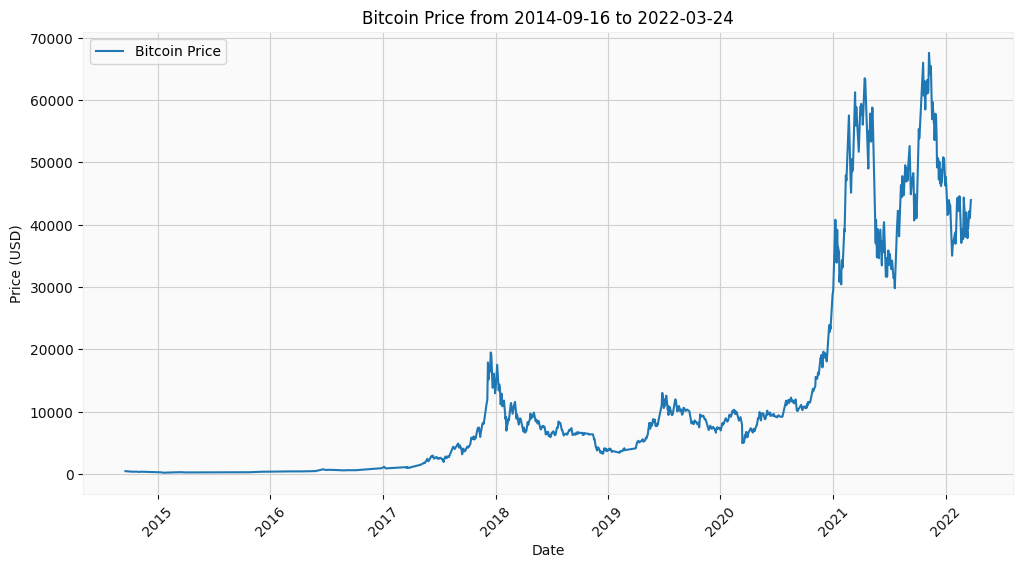

In [ ]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame to include only dates within the specified range
start_date = '2014-09-16'
end_date = '2022-03-24'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_filtered = df.loc[mask]

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(df_filtered['Date'], df_filtered['Close'], label='Bitcoin Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Bitcoin Price from 2014-09-16 to 2022-03-24')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.legend()
plt.show()

6. Visualization Candlestick graph

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


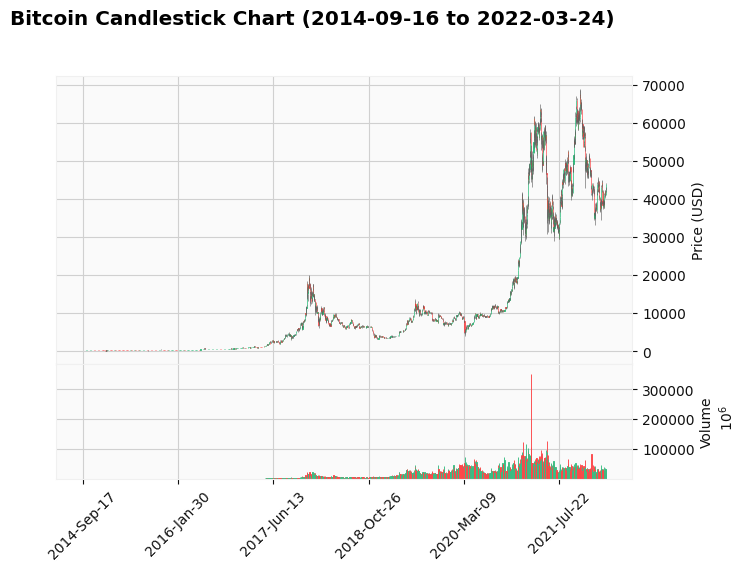

In [ ]:
import mplfinance as mpf
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter the DataFrame to include only dates within the specified range
start_date = '2014-09-16'
end_date = '2022-03-24'
mask = (df['Date'] >= start_date) & (df['Date'] <= end_date)
df_filtered = df.loc[mask]

# Set the 'Date' column as the index
df_filtered.set_index('Date', inplace=True)

# Plot the candlestick chart
mpf.plot(df_filtered, type='candle', volume=True,
         title='Bitcoin Candlestick Chart (2014-09-16 to 2022-03-24)',
         ylabel='Price (USD)',
         ylabel_lower='Volume',
         style='yahoo')

7. Feature Engineering for Random Forest

In [ ]:
# Lag Features: Created new features by shifting the closing prices by 1 to 5 days (`lag_1` to `lag_5`). These features represent the price at previous time points, which is crucial for time series forecasting.
# Rolling Statistics: Added rolling mean and standard deviation over 5-day and 10-day windows, capturing short-term trends and volatility.

# Creating lag features
df_filtered['lag_1'] = df_filtered['Close'].shift(1)
df_filtered['lag_2'] = df_filtered['Close'].shift(2)
df_filtered['lag_3'] = df_filtered['Close'].shift(3)
df_filtered['lag_4'] = df_filtered['Close'].shift(4)
df_filtered['lag_5'] = df_filtered['Close'].shift(5)
df_filtered['rolling_mean_5'] = df_filtered['Close'].rolling(window=5).mean()
df_filtered['rolling_std_5'] = df_filtered['Close'].rolling(window=5).std()
df_filtered['rolling_mean_10'] = df_filtered['Close'].rolling(window=10).mean()
df_filtered['rolling_std_10'] = df_filtered['Close'].rolling(window=10).std()

# Drop any rows with NaN values created by the shifting
df_filtered.dropna(inplace=True)

<ipython-input-14-cf53bbe6e659>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['lag_1'] = df_filtered['Close'].shift(1)
<ipython-input-14-cf53bbe6e659>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['lag_2'] = df_filtered['Close'].shift(2)
<ipython-input-14-cf53bbe6e659>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.

 8. Define features (X) and target (y)

In [ ]:
X = df_filtered[['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'rolling_mean_5', 'rolling_std_5', 'rolling_mean_10', 'rolling_std_10']]
y = df_filtered['Close']

9. Train-Test Split w/ TimeSeriesSplit

In [ ]:
# Used TimeSeriesSplit instead of a standard train-test split to maintain the temporal order of the data, which is crucial for time series data.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Initialize TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)

10. Hyperparameter Tuning with GridSearchCV

In [ ]:
# Conducted a grid search over a range of hyperparameters for the Random Forest model. This step helps in finding the best combination of parameters to improve the model’s accuracy.
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=tscv, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters from GridSearchCV
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train the model with the best parameters
# Trained the Random Forest model using the best parameters obtained from the grid search.
rf = RandomForestRegressor(random_state=42, **best_params)
rf.fit(X_train, y_train)

# Get the best model
rf_best = grid_search.best_estimator_

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


11. Make predictions

In [ ]:
y_pred = rf.predict(X_test)

12. Evaluate the model

In [ ]:
# Predicted Bitcoin prices using the trained Random Forest model.
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")

Mean Squared Error: 722370333.3012773
Mean Absolute Error: 23364.403613764778
R-squared: -2.481459266061246


13. Feature Importance

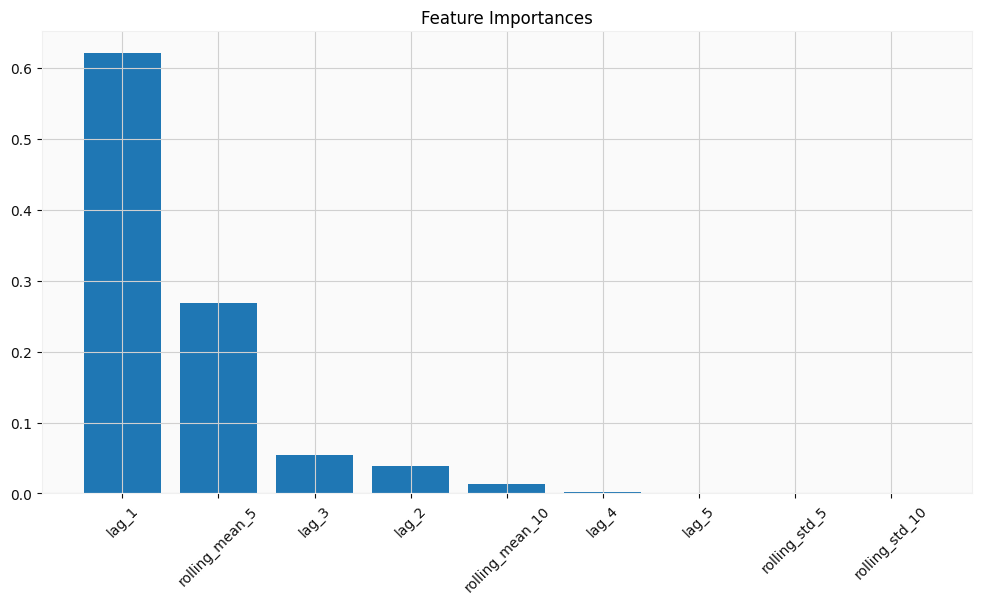

In [ ]:
# Visualized which features (lagged prices, rolling statistics) were most important in predicting Bitcoin prices, helping to interpret the model.
importances = rf_best.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.show()

14. Plot actual vs. predicted prices

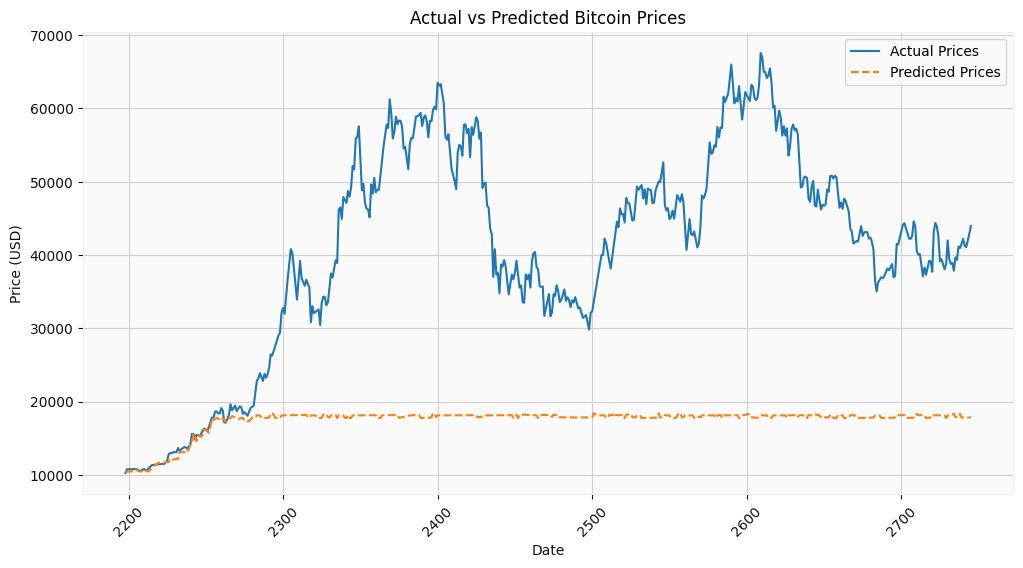

In [ ]:
# Compared actual Bitcoin prices with predicted prices visually, allowing for a straightforward assessment of model accuracy.
plt.figure(figsize=(12, 6))
plt.plot(df_filtered.index[-len(y_test):], y_test, label='Actual Prices')
plt.plot(df_filtered.index[-len(y_test):], y_pred, label='Predicted Prices', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Actual vs Predicted Bitcoin Prices')
plt.xticks(rotation=45)
plt.legend()
plt.show()

15. Dimensionality Reduction with PCA for Visualization (Optional)

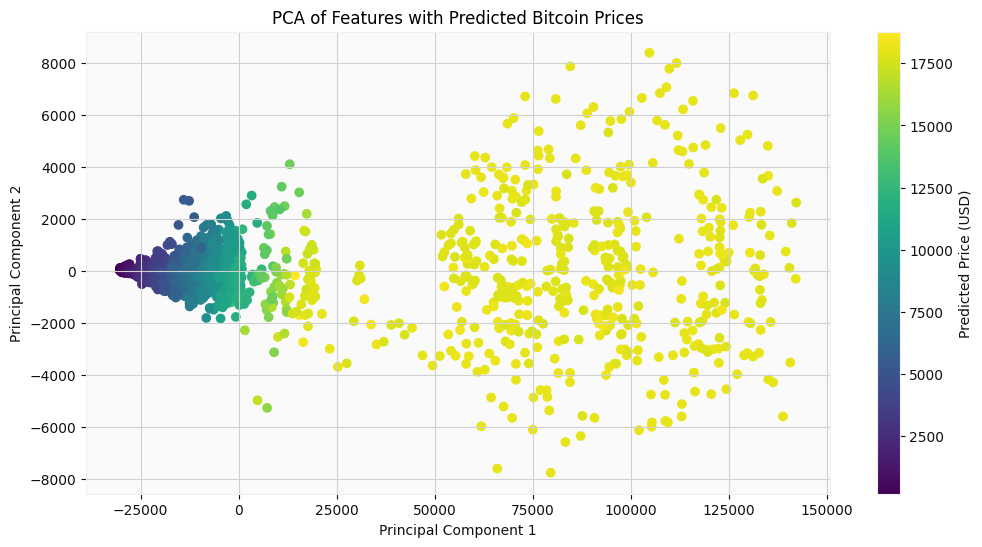

In [ ]:
# Reduced the dimensionality of features to 2D for visualization purposes, showing how the model's predictions relate to the principal components of the input data.
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=rf_best.predict(X), cmap='viridis', label='Predicted Prices')
plt.title('PCA of Features with Predicted Bitcoin Prices')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Predicted Price (USD)')
plt.show()